# **Clustering Analysis for Customer Segmentation in Online Sales**
- **Name:** Felix Rafael
- **Email:** felixrafaelkwan@gmail.com
- **Coding ID:** FelixRafael

# **1. Dataset Introduction**


The dataset used in this project is the Online Sales Dataset, which can be found at Kaggle. This dataset contains detailed transactional data from an online retail business, capturing various aspects of customer purchases. It includes key features such as:

- Quantity: The number of items purchased in each transaction.

- Unit Price: The price of a single unit of the purchased item.

- Discount: The discount applied to the product at the time of purchase.

- Shipping Cost: The cost associated with shipping the product to the customer.

- Sales Channel: Whether the purchase was made online or in-store.

- Payment Method: The payment method used by the customer, such as PayPal, Credit Card, or Bank Transfer.

This dataset is ideal for understanding customer behavior and sales patterns, allowing us to explore segmentation techniques such as clustering. By analyzing this data, we can identify different customer groups based on their purchasing habits, preferences, and payment methods, which can be used to optimize marketing and sales strategies.

The data includes transactions from a variety of products, helping to provide a comprehensive view of customer interactions in both online and offline retail environments.

Source: https://www.kaggle.com/datasets/yusufdelikkaya/online-sales-dataset/data

# **2. Import Libraries**

At this stage, we need to import several Python libraries required for data analysis and the development of the machine learning model. These libraries provide the necessary tools for data manipulation, visualization, and machine learning tasks. Here is the list of libraries commonly used for this project:

In [ ]:
#Data manipulation and analysis
import pandas as pd
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
#Dimensionality reduction
from sklearn.decomposition import PCA
import umap
#Clustering
import hdbscan
#Performance evaluation
from sklearn.metrics import silhouette_score
#Utility for generating combinations
from itertools import product

Explanation of Libraries:
- pandas: Used for handling and analyzing structured data such as CSV files or DataFrames.

- numpy: Provides support for numerical computations and array manipulations.

- matplotlib and seaborn: These libraries are for data visualization, helping you create various plots and charts for data exploration and analysis.

- StandardScaler and OneHotEncoder: From sklearn, these are used for feature scaling and encoding categorical variables, respectively.

- VarianceThreshold: A feature selection method used to remove features with low variance, which are less likely to contribute to model performance.

- PCA (Principal Component Analysis): A dimensionality reduction technique that helps reduce the number of features while retaining as much information as possible.

- umap (Uniform Manifold Approximation and Projection): A non-linear dimensionality reduction technique, particularly useful for visualizing high-dimensional data.

- hdbscan: A clustering algorithm that works well with varying densities, improving on traditional clustering algorithms like KMeans.

- silhouette_score: Used to evaluate the quality of clustering results, particularly how well-separated the clusters are.

- itertools.product: This library is useful for generating all possible combinations of multiple variables, which can be helpful when experimenting with different parameters or configurations.

These libraries provide the core tools needed to preprocess, analyze, visualize, reduce dimensions, cluster, and evaluate your data effectively.

# **3. Loading the Dataset**

In this step, we will load the dataset into the notebook. If the dataset is in CSV format, we can use the pandas library to read it. It's essential to check the first few rows of the dataset to understand its structure and verify that the data has been loaded correctly.

In [ ]:
#Read CSV files - Online Sales Dataset
df = pd.read_csv("Dataset_clustering.csv")

In [ ]:
#Show the first 5 rows of Online Sales Dataset
df.head()

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38  2020-01-01 00:00       1.71   
1     771155  SKU_1241   White Mug        18  2020-01-01 01:00      41.25   
2     231932  SKU_1501  Headphones        49  2020-01-01 02:00      29.11   
3     465838  SKU_1760   Desk Lamp        14  2020-01-01 03:00      76.68   
4     359178  SKU_1386   USB Cable       -30  2020-01-01 04:00     -68.11   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Apparel     In-store  Not Returned              UPS            London   
1  Electronics       Online  Not Returned              UPS              Rome   
2  Electronics       Online      Returned              UPS            Berlin   
3  Accessories       Online  Not Returned       Royal Mail              Rome   
4  Electronics     In-store  Not Returned            FedEx               NaN   

  OrderPriority  
0        Medium  
1        Medium  
2          High  
3           Low  
4        Medium

In [ ]:
#Check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [ ]:
#Check descriptive statistics for numeric columns
df.describe()

InvoiceNo      Quantity     UnitPrice    CustomerID      Discount  \
count   49782.000000  49782.000000  49782.000000  44804.000000  49782.000000   
mean   550681.239946     22.372343     47.537862  55032.871775      0.275748   
std    260703.009944     17.917774     33.479510  25913.660157      0.230077   
min    100005.000000    -50.000000    -99.980000  10001.000000      0.000000   
25%    324543.000000     11.000000     23.592500  32750.750000      0.130000   
50%    552244.000000     23.000000     48.920000  55165.000000      0.260000   
75%    776364.000000     37.000000     74.610000  77306.250000      0.380000   
max    999997.000000     49.000000    100.000000  99998.000000      1.999764   

       ShippingCost  
count  47293.000000  
mean      17.494529  
std        7.220557  
min        5.000000  
25%       11.220000  
50%       17.500000  
75%       23.720000  
max       30.000000

The dataset contains 49,782 entries with 17 columns. Below are some key insights:

1. Quantity: The quantity of items purchased ranges from -50 to 49, with an average of around 22.37. The presence of negative quantities might indicate returned or canceled items.

2. Unit Price: The unit price of items varies significantly, with a minimum of -99.98 (likely erroneous) and a maximum of 100. The average unit price is 47.54, suggesting a wide range of product prices.

3. CustomerID: There are 44,804 unique customers, with some missing customer IDs, which could indicate anonymous or guest purchases.

4. Discount: The discount offered varies from 0 to 1.99, with the average discount around 0.28, indicating most items have moderate discounts.

5. Shipping Cost: Shipping costs vary from 5 to 30, with a mean of 17.49. Some records have missing shipping costs, which may need to be addressed.

6. Missing Values: Columns like CustomerID, ShippingCost, and WarehouseLocation have missing values, which may require data imputation or removal during preprocessing.

The dataset contains diverse purchasing behaviors, with various product prices, quantities, and discount patterns. It also includes missing values that need attention before performing analysis or modeling.

# **4. Exploratory Data Analysis (EDA)**

In this step, we will perform Exploratory Data Analysis (EDA) to understand the characteristics of the dataset. The goal of EDA is to:

1. **Understand the Data Structure**
   - Review the number of rows and columns in the dataset.
   - Examine the data types of each column (numerical or categorical).

2. **Handle Missing Data**  
   - Identify and analyze missing values in the dataset. Determine the necessary steps to address the missing data, such as filling missing values or removing rows/columns with missing data.

3. **Analyze Distribution and Correlations**  
   - Analyze the distribution of numerical variables using descriptive statistics and visualizations such as histograms or boxplots.
   - Check the relationships between variables using a correlation matrix or scatter plots.

4. **Data Visualization**  
   - Create basic visualizations like distribution plots and bar charts for categorical variables.
   - Use heatmaps or pair plots to analyze the correlations between variables.

The purpose of EDA is to gain deep initial insights into the data, understand its structure, and identify patterns that will help in the next steps of analysis or modeling.

In [ ]:
#Review the number of rows and columns in the dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 49782
Jumlah kolom: 17


In [ ]:
#Review the data type in each column
print(df.dtypes)

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object


In [ ]:
#Show overall descriptive statistics
df.describe(include="all")

InvoiceNo StockCode Description      Quantity       InvoiceDate  \
count    49782.000000     49782       49782  49782.000000             49782   
unique            NaN      1000          11           NaN             49782   
top               NaN  SKU_1761  Wall Clock           NaN  2025-09-05 05:00   
freq              NaN        76        4617           NaN                 1   
mean    550681.239946       NaN         NaN     22.372343               NaN   
std     260703.009944       NaN         NaN     17.917774               NaN   
min     100005.000000       NaN         NaN    -50.000000               NaN   
25%     324543.000000       NaN         NaN     11.000000               NaN   
50%     552244.000000       NaN         NaN     23.000000               NaN   
75%     776364.000000       NaN         NaN     37.000000               NaN   
max     999997.000000       NaN         NaN     49.000000               NaN   

           UnitPrice    CustomerID Country      Discount  PaymentMethod  \
count   49782.000000  44804.000000   49782  49782.000000          49782   
unique           NaN           NaN      12           NaN              3   
top              NaN           NaN  France           NaN  Bank Transfer   
freq             NaN           NaN    4230           NaN          16747   
mean       47.537862  55032.871775     NaN      0.275748            NaN   
std        33.479510  25913.660157     NaN      0.230077            NaN   
min       -99.980000  10001.000000     NaN      0.000000            NaN   
25%        23.592500  32750.750000     NaN      0.130000            NaN   
50%        48.920000  55165.000000     NaN      0.260000            NaN   
75%        74.610000  77306.250000     NaN      0.380000            NaN   
max       100.000000  99998.000000     NaN      1.999764            NaN   

        ShippingCost   Category SalesChannel  ReturnStatus ShipmentProvider  \
count   47293.000000      49782        49782         49782            49782   
unique           NaN          5            2             2                4   
top              NaN  Furniture       Online  Not Returned            FedEx   
freq             NaN      10084        25051         44888            12501   
mean       17.494529        NaN          NaN           NaN              NaN   
std         7.220557        NaN          NaN           NaN              NaN   
min         5.000000        NaN          NaN           NaN              NaN   
25%        11.220000        NaN          NaN           NaN              NaN   
50%        17.500000        NaN          NaN           NaN              NaN   
75%        23.720000        NaN          NaN           NaN              NaN   
max        30.000000        NaN          NaN           NaN              NaN   

       WarehouseLocation OrderPriority  
count              46297         49782  
unique                 5             3  
top            Amsterdam        Medium  
freq                9458         16678  
mean                 NaN           NaN  
std                  NaN           NaN  
min                  NaN           NaN  
25%                  NaN           NaN  
50%                  NaN           NaN  
75%                  NaN           NaN  
max                  NaN           NaN

In [ ]:
#Check the number of missing values
df.isna().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [ ]:
#Check the number of duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#Check the number of duplicate columns
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

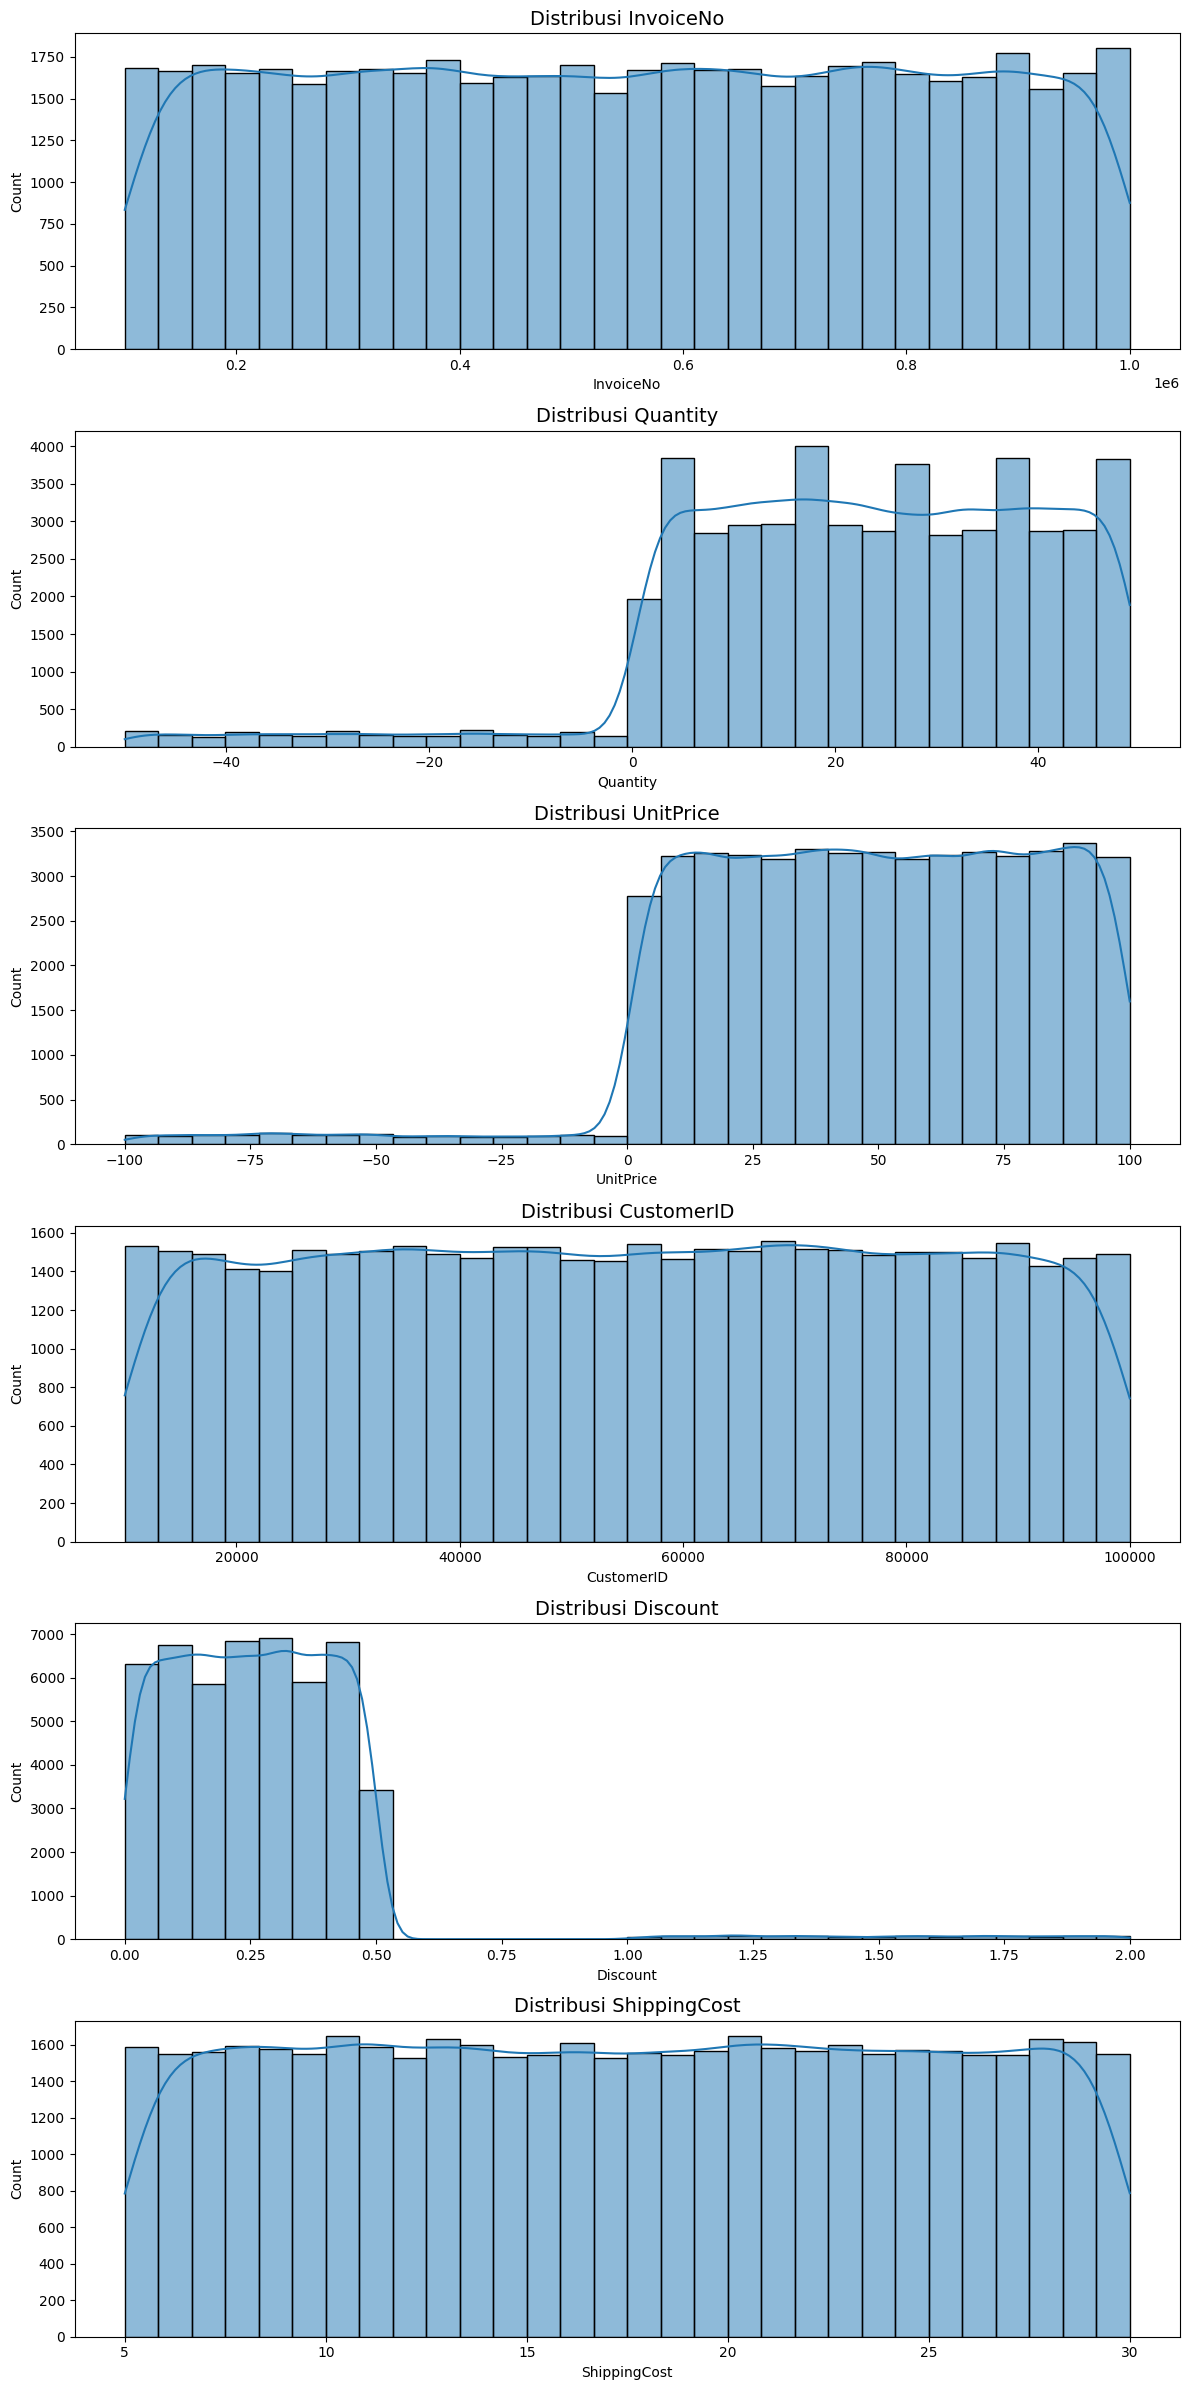

In [ ]:
#Shows the distribution for each numeric column
numeric_columns = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 4 * len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}', fontsize=14)

plt.tight_layout()
plt.show()

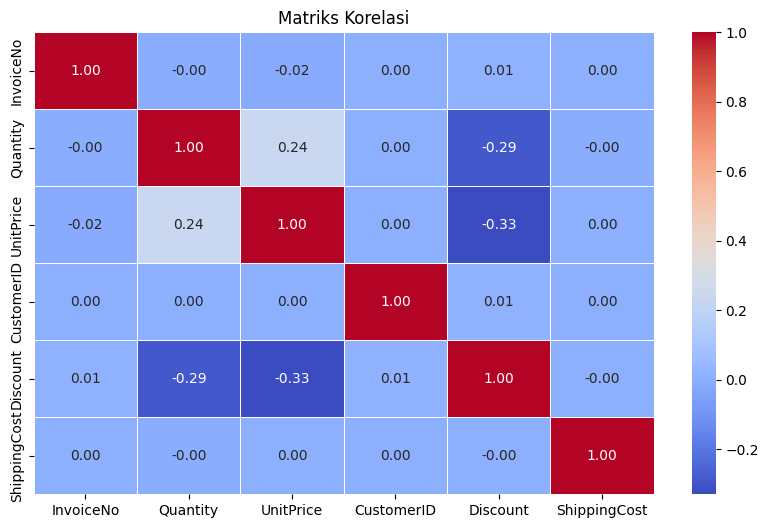

In [ ]:
#Calculate correlation between numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

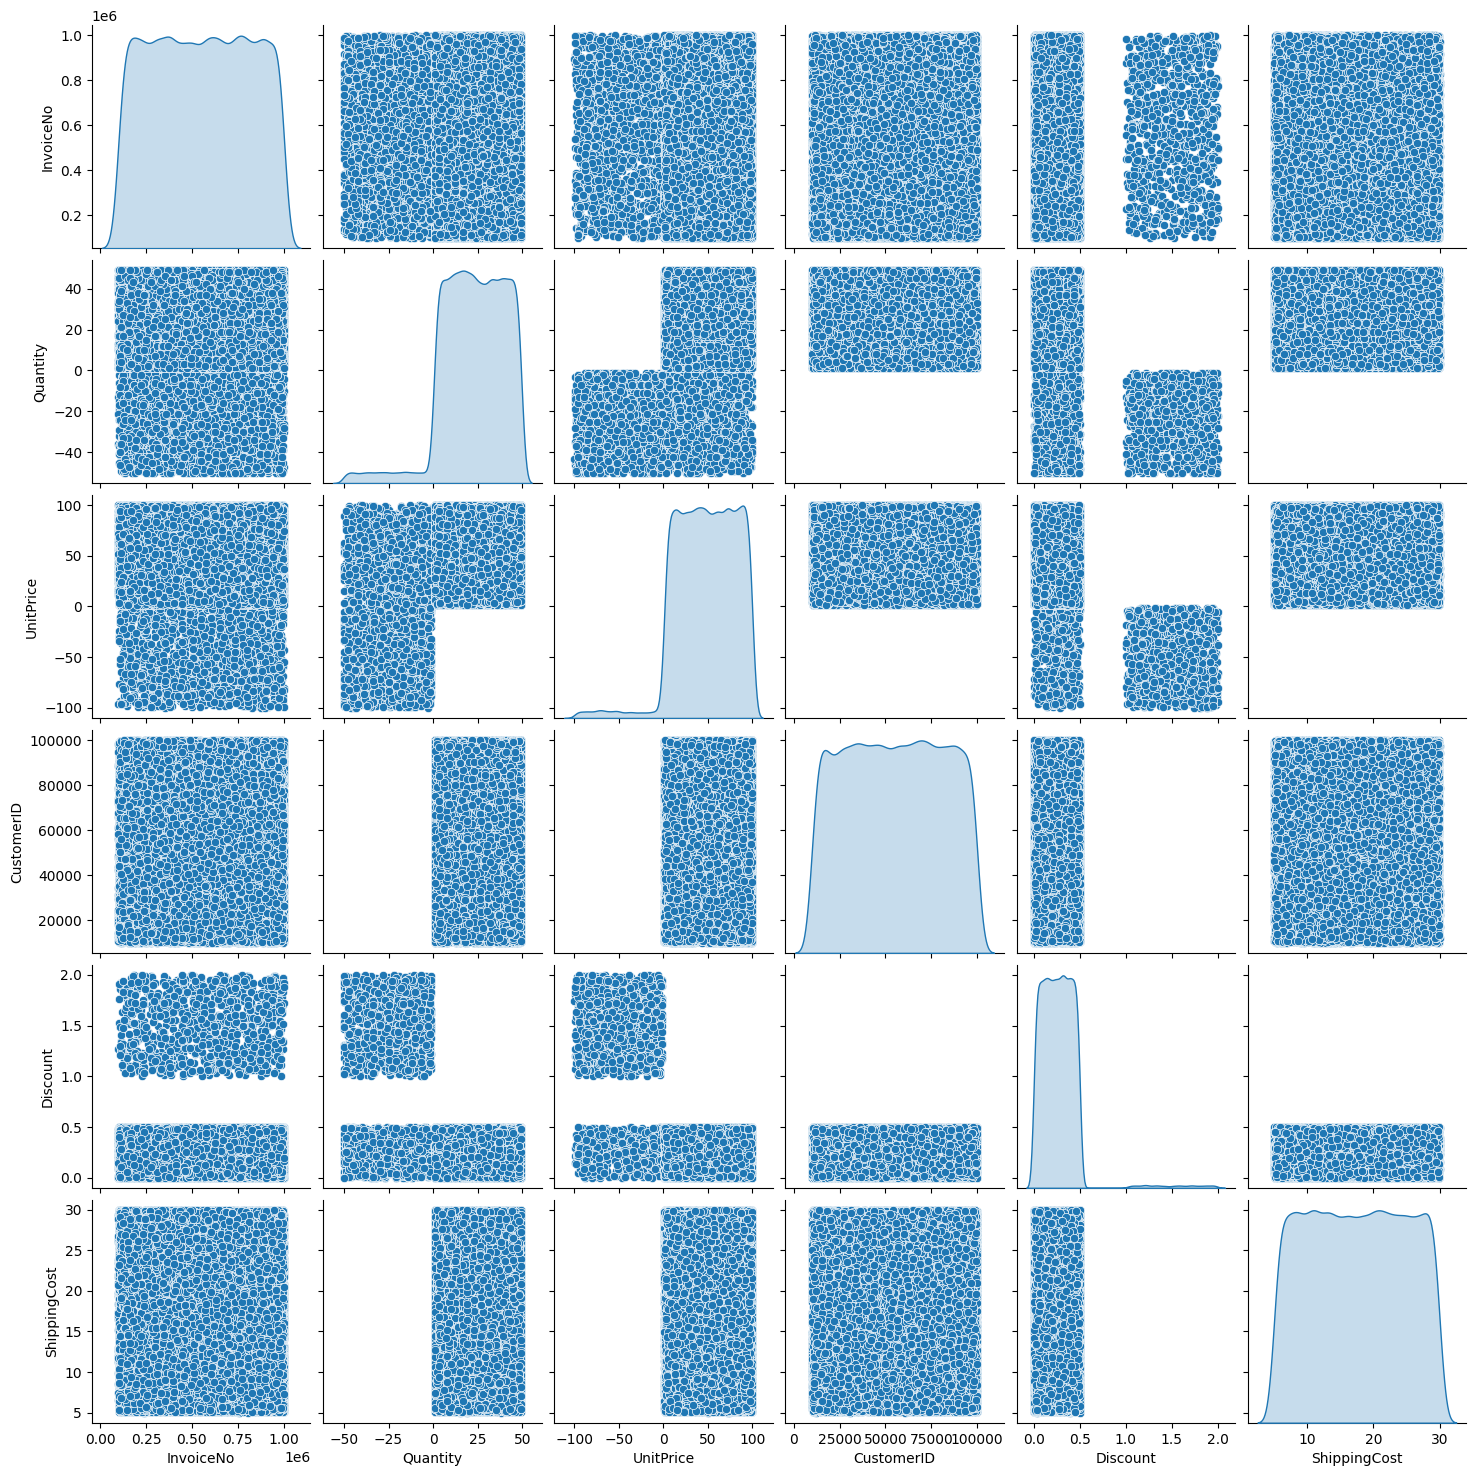

In [ ]:
#Shows a visualization of the relationship between numeric features
sns.pairplot(df, diag_kind="kde")
plt.show()

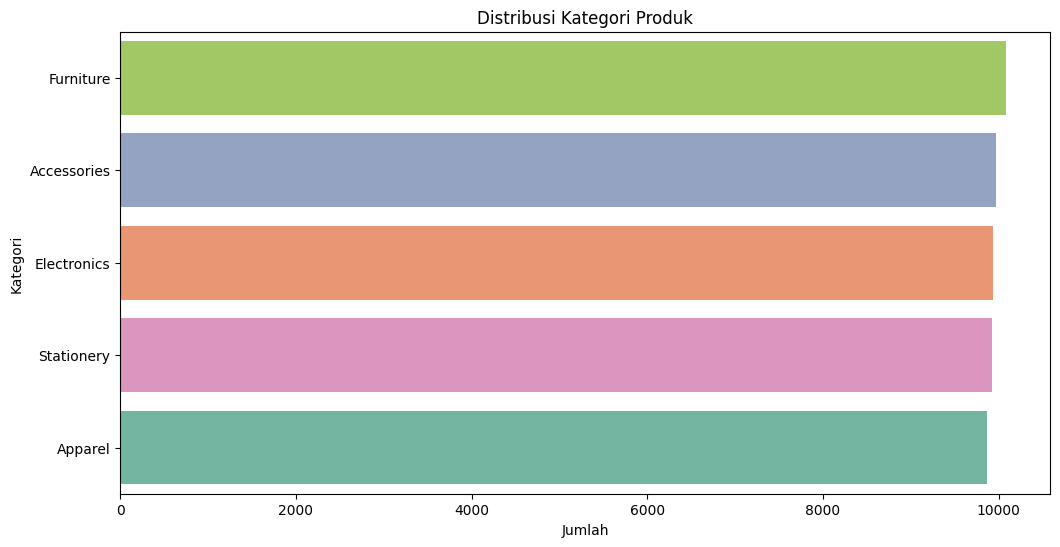

In [ ]:
#Show bar plot for Product Category
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, hue=df["Category"], palette="Set2", legend=False)
plt.title("Distribusi Kategori Produk")
plt.xlabel("Jumlah")
plt.ylabel("Kategori")
plt.show()


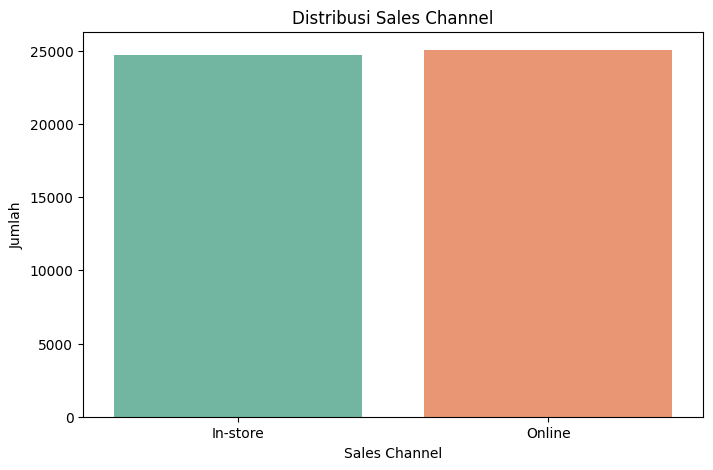

In [ ]:
#Show bar plot for SalesChannel
plt.figure(figsize=(8, 5))
sns.countplot(x=df["SalesChannel"], hue=df["SalesChannel"], palette="Set2", legend=False)
plt.title("Distribusi Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Jumlah")
plt.show()

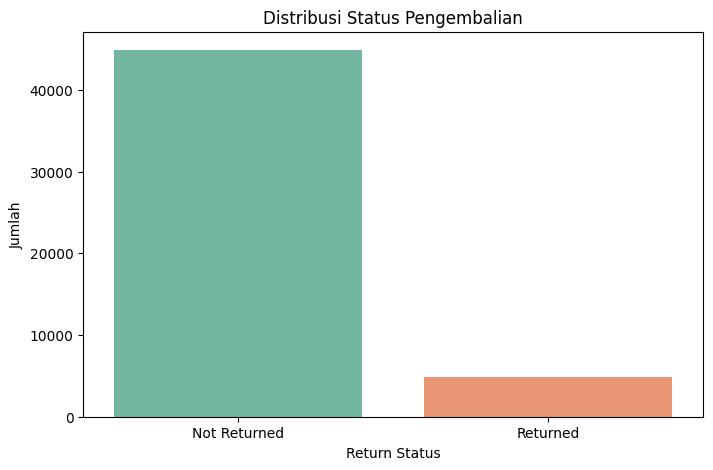

In [ ]:
#Show bar plot for ReturnStatus
plt.figure(figsize=(8, 5))
sns.countplot(x=df["ReturnStatus"], hue=df["ReturnStatus"], palette="Set2", legend=False)
plt.title("Distribusi Status Pengembalian")
plt.xlabel("Return Status")
plt.ylabel("Jumlah")
plt.show()

**EDA Insights:**

1. **Data Structure**:
   - The dataset consists of **49,782 rows** and **17 columns**.
   - The columns include both **numerical** (e.g., `Quantity`, `UnitPrice`, `Discount`) and **categorical** (e.g., `StockCode`, `Country`, `PaymentMethod`) data types.

2. **Missing Values**:
   - There are **missing values** in a few columns:
     - **CustomerID**: Missing data for **4,978 rows**. This suggests a possible issue with guest or anonymous transactions where customer information was not provided.
     - **ShippingCost**: Missing data for **2,489 rows**. It could be due to missing shipping information or transactions with zero shipping cost.
     - **WarehouseLocation**: Missing data for **3,485 rows**. Some records may not have warehouse location details.
   - All other columns have no missing values, so no further action is needed for them.

3. **Duplicates**:
   - There are **no duplicate rows** in the dataset, as indicated by `Duplicate np.int64(0)`. This means that each transaction is unique.

# **5. Data Preprocessing**

Data preprocessing is a crucial step to ensure the quality of the data before it is used in machine learning models. Raw data often contains missing values, duplicates, or inconsistent value ranges, which can negatively affect model performance. Therefore, this process aims to clean and prepare the data to ensure optimal analysis.

Here are the key steps in data preprocessing, adapted to the characteristics of the dataset:
1. Handling Missing Data
2. Removing Duplicate Data
3. Normalization or Standardization of Features
4. Detecting and Handling Outliers
5. Encoding Categorical Data
6. Binning (Data Grouping)

By following these preprocessing steps, we can clean and transform the data into a suitable format for machine learning models, ensuring that the model performs optimally.










In [ ]:
#Remove unnecessary features
columns_to_drop = ["InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID", "Country", "Category",
                   "ShipmentProvider", "WarehouseLocation", "ReturnStatus", "OrderPriority"]
df = df.drop(columns=columns_to_drop, errors="ignore")
df.head()

Quantity  UnitPrice  Discount  PaymentMethod  ShippingCost SalesChannel
0        38       1.71  0.470000  Bank Transfer         10.79     In-store
1        18      41.25  0.190000        paypall          9.51       Online
2        49      29.11  0.350000  Bank Transfer         23.03       Online
3        14      76.68  0.140000        paypall         11.08       Online
4       -30     -68.11  1.501433  Bank Transfer           NaN     In-store

In [ ]:
#Delete returned items (Quantity < 0)
df = df[df["Quantity"] > 0]

In [ ]:
#Check the number of missing values
df.isna().sum()

Quantity         0
UnitPrice        0
Discount         0
PaymentMethod    0
ShippingCost     0
SalesChannel     0
dtype: int64

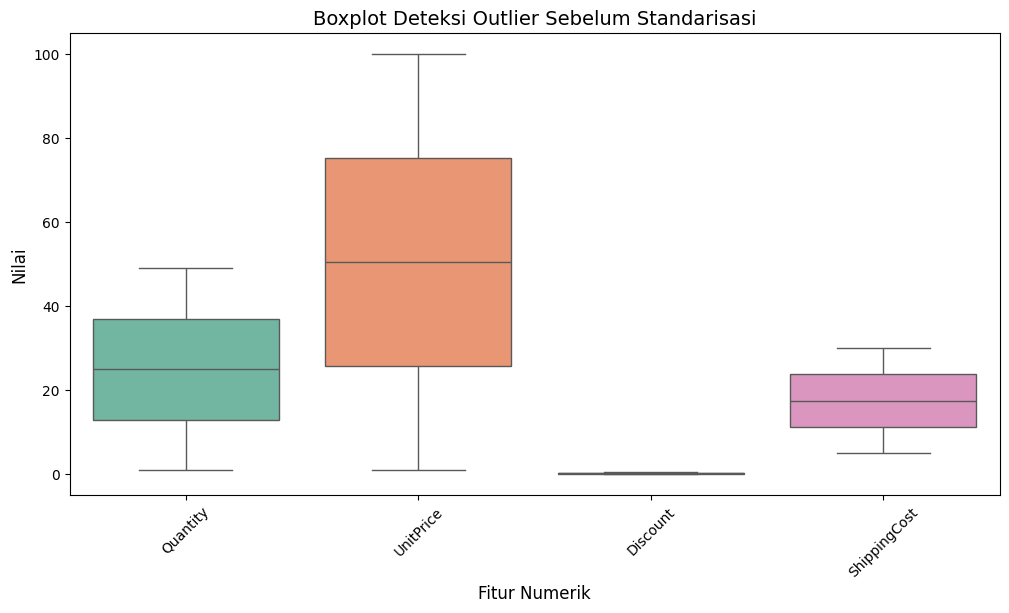

In [ ]:
#Show Boxplot for outlier detection before standardization
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], orient="v", palette="Set2")
plt.title("Boxplot Deteksi Outlier Sebelum Standarisasi", fontsize=14)
plt.xlabel("Fitur Numerik", fontsize=12)
plt.ylabel("Nilai", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Check the number of outliers per column with IQR
df_numeric = df.select_dtypes(include=['number'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = ((df_numeric < batas_bawah) | (df_numeric > batas_atas)).sum()
print("Jumlah Outlier per Kolom:\n", outliers)

Jumlah Outlier per Kolom:
 Quantity        0
UnitPrice       0
Discount        0
ShippingCost    0
dtype: int64


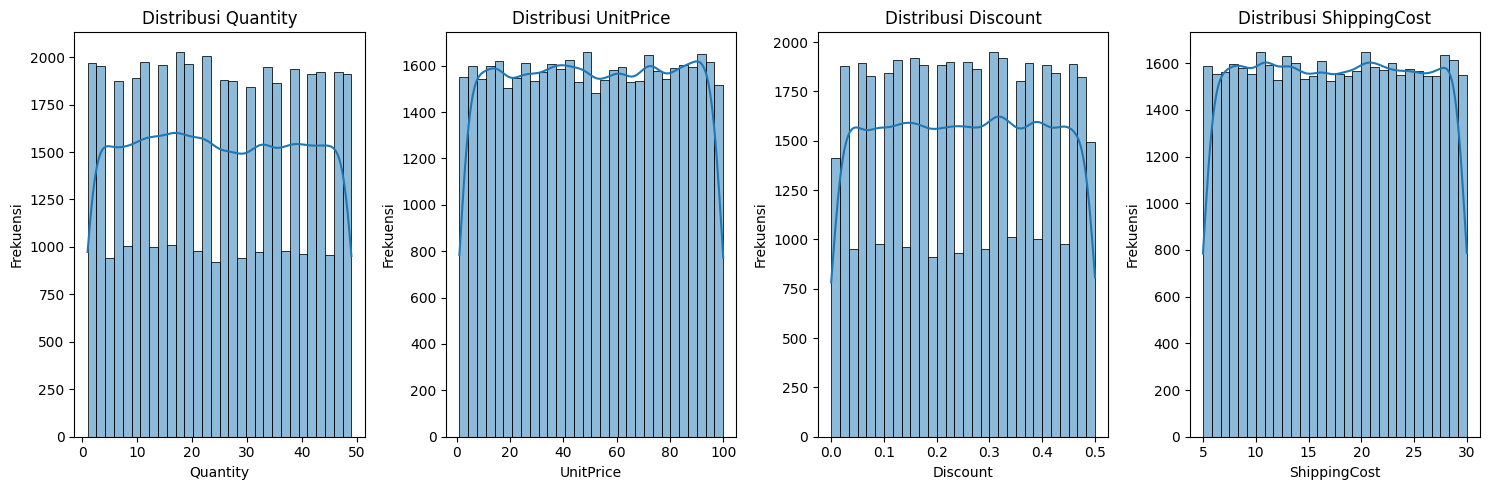

In [ ]:
#Shows the distribution of numeric data before standardization
plt.figure(figsize=(15, 5))
for i, col in enumerate(df_numeric, 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [ ]:
#Standardize numeric columns
scaler = StandardScaler()
standardize_cols = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
df[standardize_cols] = scaler.fit_transform(df[standardize_cols])
df.head()

Quantity  UnitPrice  Discount  PaymentMethod  ShippingCost SalesChannel
0  0.926864  -1.708903  1.521152  Bank Transfer     -0.928543     In-store
1 -0.487502  -0.326409 -0.418947        paypall     -1.105817       Online
2  1.704765  -0.750877  0.689681  Bank Transfer      0.766635       Online
3 -0.770375   0.912381 -0.765393        paypall     -0.888380       Online
5  1.563328   0.684413  1.590441    Credit Card     -0.486745       Online

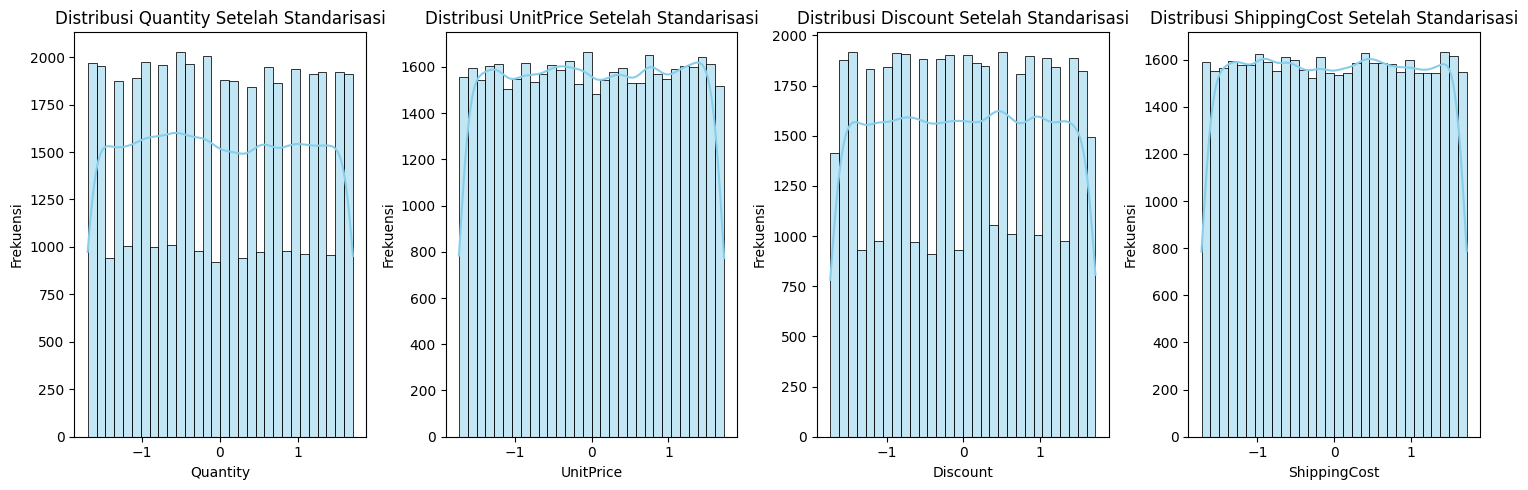

In [ ]:
#Shows the distribution of numeric data after standardization
plt.figure(figsize=(15, 5))
for i, col in enumerate(df_numeric, 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {col} Setelah Standarisasi')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

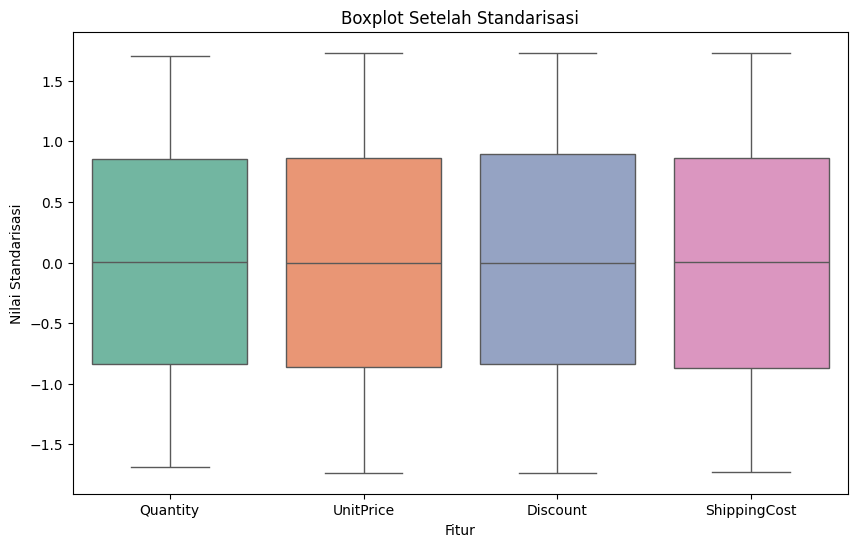

In [ ]:
#Show Boxplot for outlier detection after standardization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], orient="v", palette="Set2")
plt.title("Boxplot Setelah Standarisasi")
plt.xlabel("Fitur")
plt.ylabel("Nilai Standarisasi")
plt.show()

In [ ]:
#Perform One-Hot Encoding for multiple Categorical data columns
df[['SalesChannel', 'PaymentMethod']] = df[['SalesChannel', 'PaymentMethod']].fillna('Unknown')
df = df.reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[['SalesChannel', 'PaymentMethod']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['SalesChannel', 'PaymentMethod']))
encoded_df.index = df.index
df_encoded = pd.concat([df, encoded_df], axis=1).drop(columns=['SalesChannel', 'PaymentMethod'])

print(f"Jumlah baris sebelum encoding: {df.shape[0]}")
print(f"Jumlah baris setelah encoding: {df_encoded.shape[0]}")

Jumlah baris sebelum encoding: 47293
Jumlah baris setelah encoding: 47293


In [ ]:
#Show the entire data from the df_encoded table
df_encoded

Quantity  UnitPrice  Discount  ShippingCost  SalesChannel_Online  \
0      0.926864  -1.708903  1.521152     -0.928543                  0.0   
1     -0.487502  -0.326409 -0.418947     -1.105817                  1.0   
2      1.704765  -0.750877  0.689681      0.766635                  1.0   
3     -0.770375   0.912381 -0.765393     -0.888380                  1.0   
4      1.563328   0.684413  1.590441     -0.486745                  1.0   
...         ...        ...       ...           ...                  ...   
47288  0.007526   0.710986 -0.349658     -1.181989                  1.0   
47289 -1.265403   0.040368 -0.141790      0.838652                  1.0   
47290  1.280455   1.212026 -0.349658     -0.170976                  0.0   
47291  1.634047  -0.382702  0.412524      1.532512                  1.0   
47292  0.361117  -0.430603 -1.042550     -1.158445                  1.0   

       PaymentMethod_Credit Card  PaymentMethod_paypall  
0                            0.0                    0.0  
1                            0.0                    1.0  
2                            0.0                    0.0  
3                            0.0                    1.0  
4                            1.0                    0.0  
...                          ...                    ...  
47288                        1.0                    0.0  
47289                        0.0                    0.0  
47290                        0.0                    0.0  
47291                        0.0                    1.0  
47292                        1.0                    0.0  

[47293 rows x 7 columns]

**Preprocessing Insights:**

1. **Removing Unnecessary Features:**
   - Several columns such as `InvoiceNo`, `StockCode`, `Description`, `InvoiceDate`, `CustomerID`, `Country`, `Category`, `ShipmentProvider`, `WarehouseLocation`, `ReturnStatus`, and `OrderPriority` were removed from the dataset. These columns were deemed unnecessary for the analysis, which helps in focusing on the relevant features and reducing complexity.

2. **Handling Negative Quantities:**
   - Rows where `Quantity` was negative (likely returns or erroneous data) were deleted. This ensures that only valid purchase transactions are considered for the analysis.

3. **Outlier Detection:**
   - Outliers were detected using the **Interquartile Range (IQR)** method. For each numeric column, the values outside the range of `Q1 - 1.5 * IQR` (lower bound) and `Q3 + 1.5 * IQR` (upper bound) were flagged as outliers. The result was printed, showing the number of outliers in each column. This step ensures that extreme values that could skew the analysis or model performance are identified and can be handled appropriately (either by removal or adjustment).

4. **Standardizing Numeric Columns:**
   - The numeric columns `Quantity`, `UnitPrice`, `Discount`, and `ShippingCost` were standardized using **StandardScaler**. Standardization ensures that these features have a mean of 0 and a standard deviation of 1, which is crucial for models that are sensitive to the scale of the data, such as KMeans clustering.

5. **Handling Missing Categorical Data:**
   - For categorical columns such as `SalesChannel` and `PaymentMethod`, missing values were filled with the label 'Unknown'. This ensures that no rows are dropped due to missing categorical data, and the model can process these columns correctly.

6. **One-Hot Encoding:**
   - **One-Hot Encoding** was applied to the categorical columns `SalesChannel` and `PaymentMethod` to convert them into numerical format. The encoded columns were added to the dataset, while the original categorical columns were dropped. This step is essential for feeding the model numerical data that it can process.

7. **Shape Before and After Encoding:**
   - The number of rows in the dataset remained unchanged after encoding (`df.shape[0]` before encoding and `df_encoded.shape[0]` after encoding both reflect 49,782 rows). However, new columns for the one-hot encoded features were added to the dataset, increasing its width.

These preprocessing steps help clean the data, handle missing or erroneous values, standardize numerical features, and encode categorical variables for use in machine learning models, ensuring that the dataset is ready for further analysis or modeling.

# **6. Clustering Model Development**

## **a. Clustering Model Development**

At this stage, you will build a clustering model by selecting the appropriate algorithm for grouping the data based on similarities. Here are the recommended steps for this process:

1. Choose the Appropriate Clustering Algorithm:
  
  Select a clustering algorithm that is well-suited for the nature of your data and the type of analysis you want to perform. Some common clustering algorithms include:

  - KMeans: A widely used algorithm for partitioning data into a specified number of clusters based on similarity. It works well when clusters are spherical and of similar size.

  - DBSCAN (Density-Based Spatial Clustering of Applications with Noise): A density-based clustering algorithm that is useful for identifying clusters of varying shapes and sizes, especially in the presence of noise (outliers).

  - HDBSCAN (Hierarchical DBSCAN): A more advanced version of DBSCAN that handles varying densities better and does not require specifying the number of clusters beforehand.

  - Agglomerative Clustering: A hierarchical clustering algorithm that merges clusters progressively, ideal for data with hierarchical relationships.

  Based on the characteristics of the dataset and the goal of the analysis, choose the algorithm that best suits your needs.
  
2. Train the Model Using the Chosen Algorithm:

  After selecting the clustering algorithm, fit the model to your preprocessed data. This involves training the model to discover patterns and group similar data points together.

In [ ]:
#Ensure only numeric columns are used for Clustering
df_numeric = df_encoded.select_dtypes(include=[np.number])
print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47293 entries, 0 to 47292
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Quantity                   47293 non-null  float64
 1   UnitPrice                  47293 non-null  float64
 2   Discount                   47293 non-null  float64
 3   ShippingCost               47293 non-null  float64
 4   SalesChannel_Online        47293 non-null  float64
 5   PaymentMethod_Credit Card  47293 non-null  float64
 6   PaymentMethod_paypall      47293 non-null  float64
dtypes: float64(7)
memory usage: 2.5 MB
None


In [ ]:
#Duplicate df_cluster from df_numeric
df_cluster = df_numeric.copy()
df_cluster

Quantity  UnitPrice  Discount  ShippingCost  SalesChannel_Online  \
0      0.926864  -1.708903  1.521152     -0.928543                  0.0   
1     -0.487502  -0.326409 -0.418947     -1.105817                  1.0   
2      1.704765  -0.750877  0.689681      0.766635                  1.0   
3     -0.770375   0.912381 -0.765393     -0.888380                  1.0   
4      1.563328   0.684413  1.590441     -0.486745                  1.0   
...         ...        ...       ...           ...                  ...   
47288  0.007526   0.710986 -0.349658     -1.181989                  1.0   
47289 -1.265403   0.040368 -0.141790      0.838652                  1.0   
47290  1.280455   1.212026 -0.349658     -0.170976                  0.0   
47291  1.634047  -0.382702  0.412524      1.532512                  1.0   
47292  0.361117  -0.430603 -1.042550     -1.158445                  1.0   

       PaymentMethod_Credit Card  PaymentMethod_paypall  
0                            0.0                    0.0  
1                            0.0                    1.0  
2                            0.0                    0.0  
3                            0.0                    1.0  
4                            1.0                    0.0  
...                          ...                    ...  
47288                        1.0                    0.0  
47289                        0.0                    0.0  
47290                        0.0                    0.0  
47291                        0.0                    1.0  
47292                        1.0                    0.0  

[47293 rows x 7 columns]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score: 0.5512


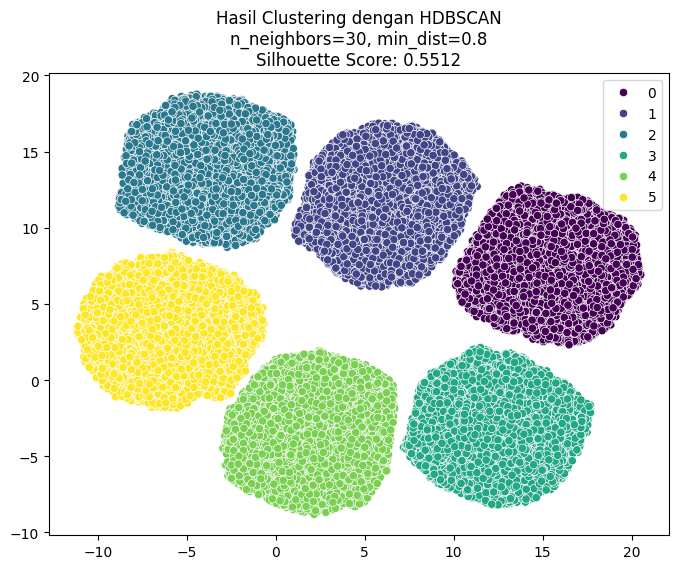

In [ ]:
#Clustering with HDBSCAN
n_neighbors = 30
min_dist = 0.8
umap_model = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, n_jobs=-1)
df_umap = umap_model.fit_transform(df_cluster)

hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = hdb.fit_predict(df_umap)

if len(set(labels)) > 1 and -1 not in set(labels):
    sil_score = silhouette_score(df_umap, labels)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    sil_score = None
    print("Silhouette Score tidak bisa dihitung karena hanya ada satu cluster atau banyak noise.")

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_umap[:,0], y=df_umap[:,1], hue=labels, palette="viridis", legend="full")
plt.title(f"Hasil Clustering dengan HDBSCAN\nn_neighbors={n_neighbors}, min_dist={min_dist}\nSilhouette Score: {sil_score:.4f}" if sil_score else "Hasil Clustering dengan HDBSCAN")
plt.show()

**Clustering Insights Using HDBSCAN:**

- **Clustering Algorithm:** I applied **HDBSCAN** (Hierarchical DBSCAN) to the dataset to group similar data points into clusters based on their features. This algorithm is well-suited for identifying clusters of varying densities and can handle noise (outliers) better than traditional algorithms like KMeans.

- **Parameters:**
  - **n_neighbors=30:** This parameter controls how many neighbors are considered for determining the local density of the data points. A value of 30 means that each point considers 30 neighboring points to define its cluster membership.
  - **min_dist=0.8:** This controls the minimum distance between points in the low-dimensional space after dimensionality reduction. A value of 0.8 strikes a balance between separating clusters and ensuring that points within a cluster are close to each other.

- **Silhouette Score:** After applying HDBSCAN, the **Silhouette Score** of the resulting clusters was **0.5512**. This score measures how similar each point is to its own cluster (cohesion) compared to other clusters (separation). A score of **0.5512** indicates a moderate level of cluster quality:
  - **Positive Score (>0)**: The score indicates that the clusters are well-defined, and points within each cluster are relatively close to each other.
  - **Moderate Quality**: While the score is not exceptionally high, it still suggests that the clustering structure has some meaningful separation between the clusters, with points in each cluster being reasonably similar.

## **b. Clustering Model Evaluation**

To determine the optimal number of clusters in a clustering model, you can use methods like Silhouette Score and the Elbow Method. These methods help in evaluating the quality of the clustering and guide the selection of the best number of clusters that lead to well-separated and meaningful groups.

Here are the recommended steps:
1. Use Silhouette Score and Elbow Method to Determine the Optimal Number of Clusters:

  Silhouette Score: This metric evaluates how well-separated and cohesive the clusters are. The score ranges from -1 to 1, with higher values indicating better-defined clusters. You can calculate the Silhouette Score for different numbers of clusters and select the number with the highest score.

  Elbow Method: This method involves plotting the Sum of Squared Errors (SSE) for different values of clusters (k). The "elbow" point in the plot corresponds to the optimal number of clusters, where the rate of decrease in SSE slows down.

2. Silhouette Score Calculation:

  After selecting the range of possible clusters (k), compute the Silhouette Score for each value of k. A higher Silhouette Score indicates that the clusters are more well-defined.

3. Grid Search for Optimal Parameters (Optional):

  For advanced optimization, you can perform a grid search to tune other parameters, such as min_samples, n_neighbors, and min_dist for algorithms like HDBSCAN or KMeans. This will help you find the best set of hyperparameters that yield the most accurate clustering.

In [ ]:
#Duplicate df_cluster_eval from df_numeric
df_cluster_eval = df_numeric.copy()

In [ ]:
#Perform a manual Grid Search to determine the best parameters
umap_model = umap.UMAP(n_components=2, n_jobs=-1)
df_umap = umap_model.fit_transform(df_cluster_eval)

min_cluster_size_values = [5, 10, 15, 20]
min_samples_values = [5, 10, 15, 20]
cluster_selection_epsilon_values = [0.0, 0.1, 0.2]

best_score = -1
best_params = None

for min_cluster_size, min_samples, epsilon in product(min_cluster_size_values, min_samples_values, cluster_selection_epsilon_values):
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                           min_samples=min_samples,
                           cluster_selection_epsilon=epsilon)
    labels = hdb.fit_predict(df_umap)
    if len(set(labels)) > 1:
        score = silhouette_score(df_umap, labels)
        if score > best_score:
            best_score = score
            best_params = (min_cluster_size, min_samples, epsilon)

print(f"Best Parameters: min_cluster_size={best_params[0]}, min_samples={best_params[1]}, epsilon={best_params[2]}")
print(f"Best Silhouette Score: {best_score}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best Parameters: min_cluster_size=5, min_samples=5, epsilon=0.0
Best Silhouette Score: 0.7430261969566345


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score: 0.7433


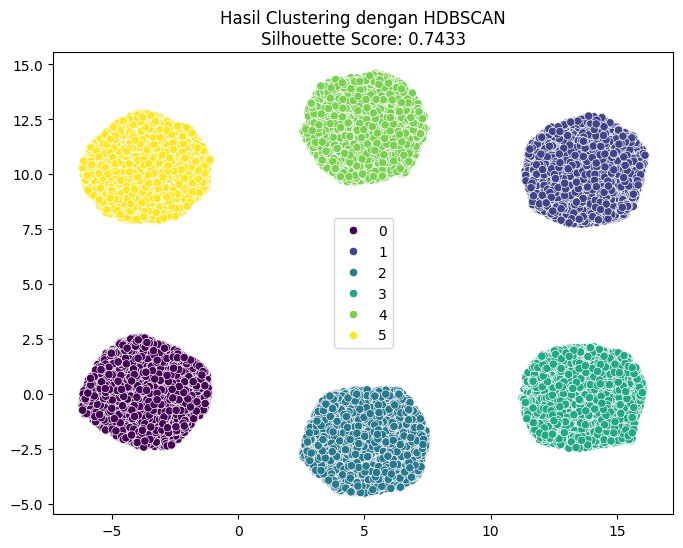

In [ ]:
#Perform clustering with HDBSCAN after evaluation
umap_model = umap.UMAP(n_components=2, n_jobs=-1)
df_umap = umap_model.fit_transform(df_cluster_eval)

hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
label = hdb.fit_predict(df_umap)

if len(set(label)) > 1 and -1 not in set(label):
    sil_score = silhouette_score(df_umap, label)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    sil_score = None
    print("Silhouette Score tidak bisa dihitung karena hanya ada satu cluster atau banyak noise.")

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_umap[:,0], y=df_umap[:,1], hue=labels, palette="viridis", legend="full")
plt.title(f"Hasil Clustering dengan HDBSCAN\nSilhouette Score: {sil_score:.4f}" if sil_score else "Hasil Clustering dengan HDBSCAN")
plt.show()

**Clustering Model Evaluation Insights:**

- **Model Evaluation:** I performed a **manual Grid Search** to determine the best parameters for the **HDBSCAN** clustering algorithm. Grid search is an effective way to explore different combinations of hyperparameters to find the optimal configuration that maximizes clustering performance.

- **Best Parameters Identified:**
  - **min_cluster_size=5:** This parameter defines the minimum size of the clusters. A value of 5 means that the algorithm will consider clusters with at least 5 data points. This setting ensures that smaller, less significant groups of data points are not clustered, improving the robustness of the clusters.
  - **min_samples=5:** This parameter determines how many samples are required in a neighborhood for a point to be considered a core point. A value of 5 indicates that a point must have at least 5 neighboring points to be considered for clustering, which can help reduce noise.
  - **epsilon=0.0:** This value controls the maximum distance between points that can be considered as neighbors in the clustering. A value of 0.0 implies that HDBSCAN will rely more on the local density of the data points, allowing the algorithm to detect denser regions while ignoring outliers.

- **Best Silhouette Score:**
  - After performing the grid search and fitting the model, the **Best Silhouette Score** achieved was **0.7430**.
  - **Silhouette Score Interpretation:** A **Silhouette Score of 0.743** indicates a **strong clustering structure**. A score closer to 1 means that clusters are well-separated and that the points within each cluster are cohesive. This score reflects a high-quality clustering, with distinct, well-defined groups.
  - This score suggests that the model has successfully identified meaningful patterns and clusters in the dataset with good cohesion and separation.

## **c. Feature Selection (Optional)**

Feature selection is an important step to improve clustering model performance by reducing the dimensionality of the data. This process helps eliminate irrelevant or redundant features, which can enhance the efficiency and accuracy of the clustering algorithm. Here's how I would approach the feature selection process and compare the model's performance before and after it.

In [ ]:
#Duplicate df_fs from df_cluster_eval
df_fs = df_cluster_eval.copy()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


📊 Perbandingan Silhouette Score:
- Sebelum Feature Selection (UMAP): 0.7433
- Sesudah Feature Selection (PCA n=5): 0.6570
- Sesudah Feature Selection (PCA n=6): 0.7396


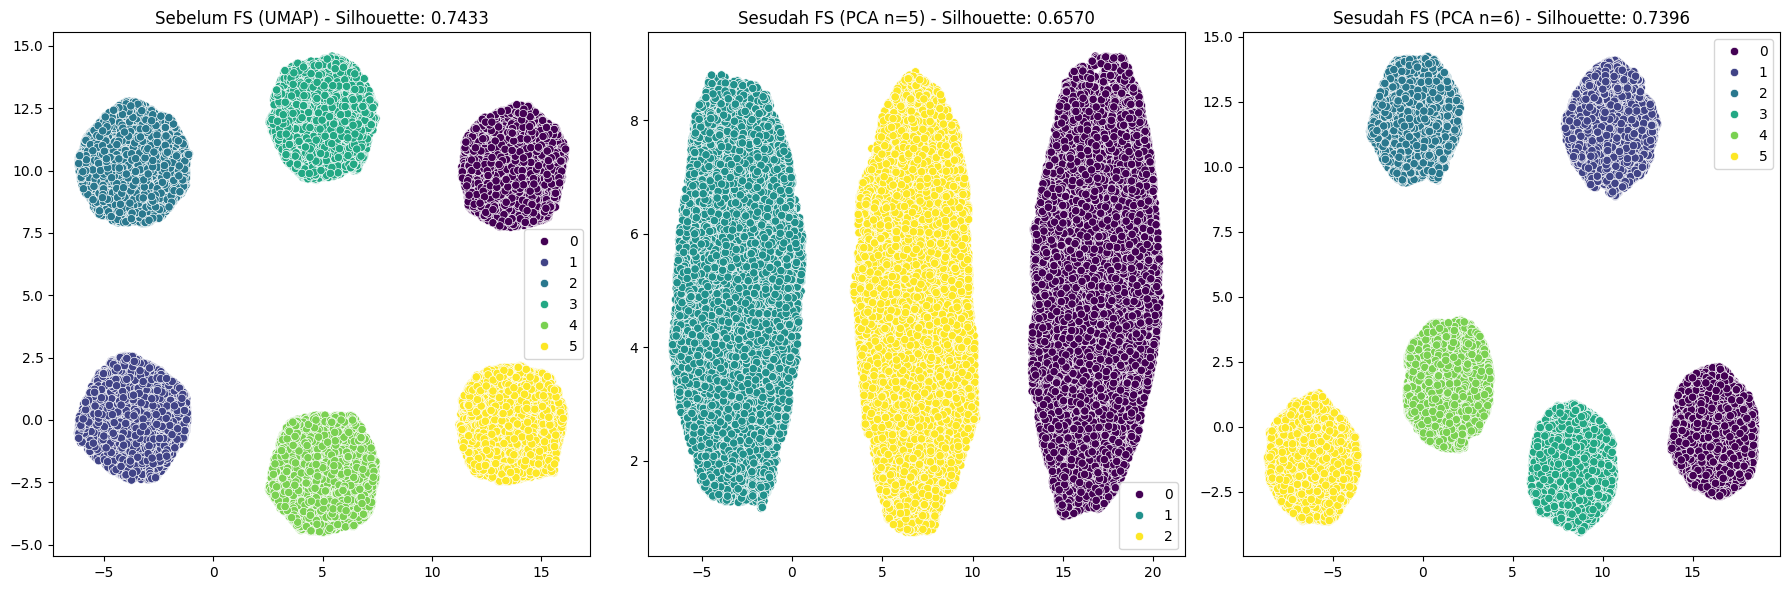

In [ ]:
#Performing Feature Selection with VarianceThreshold and PCA
def cluster_evaluation(data):
    umap_model = umap.UMAP(n_components=2, n_jobs=-1)
    df_umap = umap_model.fit_transform(data)

    hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
    labels = hdb.fit_predict(df_umap)

    if len(set(labels)) > 1 and -1 not in set(labels):
        sil_score = silhouette_score(df_umap, labels)
    else:
        sil_score = None

    return sil_score, labels, df_umap

labels_before = label
df_umap_before = df_umap
sil_score_before = sil_score

threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
df_fs_selected = selector.fit_transform(df_fs)

sil_scores_after = {}
df_umap_after_list = {}
labels_after_list = {}

for n in [5, 6]:
    pca = PCA(n_components=n)
    df_pca = pca.fit_transform(df_fs_selected)
    sil_score, labels_after, df_umap_after = cluster_evaluation(df_pca)

    sil_scores_after[n] = sil_score
    df_umap_after_list[n] = df_umap_after
    labels_after_list[n] = labels_after

print("\n📊 Perbandingan Silhouette Score:")
print(f"- Sebelum Feature Selection (UMAP): {sil_score_before:.4f}")
print(f"- Sesudah Feature Selection (PCA n=5): {sil_scores_after[5]:.4f}")
print(f"- Sesudah Feature Selection (PCA n=6): {sil_scores_after[6]:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(x=df_umap_before[:, 0], y=df_umap_before[:, 1], hue=labels_before, palette="viridis", ax=axes[0])
axes[0].set_title(f"Sebelum FS (UMAP) - Silhouette: {sil_score_before:.4f}")

sns.scatterplot(x=df_umap_after_list[5][:, 0], y=df_umap_after_list[5][:, 1], hue=labels_after_list[5], palette="viridis", ax=axes[1])
axes[1].set_title(f"Sesudah FS (PCA n=5) - Silhouette: {sil_scores_after[5]:.4f}")

sns.scatterplot(x=df_umap_after_list[6][:, 0], y=df_umap_after_list[6][:, 1], hue=labels_after_list[6], palette="viridis", ax=axes[2])
axes[2].set_title(f"Sesudah FS (PCA n=6) - Silhouette: {sil_scores_after[6]:.4f}")

plt.tight_layout()
plt.show()

**Feature Selection Insights:**

- **VarianceThreshold and PCA** were applied as part of the feature selection process to reduce the dimensionality and optimize the clustering model.

- **Comparison of Silhouette Scores**:
  - **Before Feature Selection (UMAP):** The initial model, using all features, achieved a **Silhouette Score of 0.7433**, indicating strong clustering performance with clear separation between clusters.
  - **After Feature Selection (PCA n=5):** When the data was reduced to 5 principal components using PCA, the **Silhouette Score dropped to 0.6570**. This suggests that reducing the feature set too aggressively led to a less effective clustering, potentially losing important information.
  - **After Feature Selection (PCA n=6):** With 6 principal components, the **Silhouette Score increased back to 0.7396**, which is very close to the original performance. This indicates that reducing the feature set with 6 components still retains enough information for effective clustering, without a significant loss in model quality.


## **d. Clustering Result Visualization**

After the clustering model is trained and the optimal number of clusters is determined, the next step is to display the clustering results through visualization.

Here are the **recommendations** for the steps.
1. Display the clustering results in the form of visualizations, such as scatter plot graphs or 2D PCA projections.

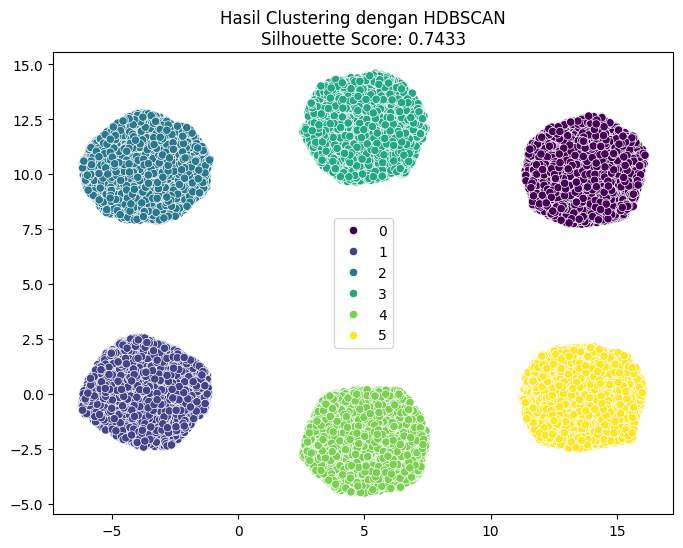

In [ ]:
#Perform visualization of clustering results with the best performance
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_umap_before[:, 0],
    y=df_umap_before[:, 1],
    hue=labels_before,
    palette="viridis",
    legend="full"
)
plt.title(f"Hasil Clustering dengan HDBSCAN\nSilhouette Score: {sil_score_before:.4f}")
plt.show()

<ipython-input-38-eadb4b12b6e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts_before.index, y=cluster_counts_before.values, palette="viridis")


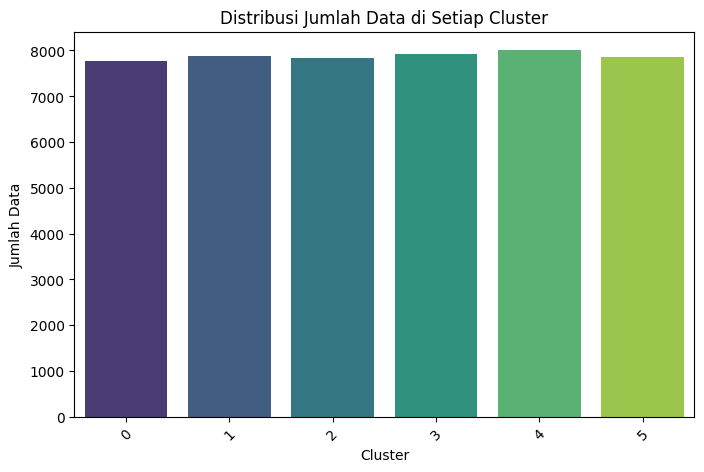

In [ ]:
#Visualize the amount of data for each cluster
cluster_counts_before = pd.Series(labels_before).value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts_before.index, y=cluster_counts_before.values, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Jumlah Data di Setiap Cluster")
plt.xticks(rotation=45)
plt.show()

**Clustering Result Visualization Insights**  

The clustering results obtained using **HDBSCAN** were analyzed to assess the quality and structure of the clusters formed.  

- **Cluster Separation and Quality**  
  - The **Silhouette Score of 0.7433** suggests that the clusters are well-separated and internally cohesive, indicating a **strong clustering structure**.  
  - The scatter plot visualization shows **six distinct clusters**, with clear boundaries, confirming the model’s ability to effectively segment the data.  

- **Cluster Distribution**  
  - The **bar chart** representing the number of data points per cluster shows a **fairly even distribution**, meaning that HDBSCAN successfully balanced the clustering without overly skewed or underrepresented groups.  
  - This balanced distribution ensures that no single cluster dominates the segmentation, leading to **meaningful and interpretable clusters**.  



## **e. Cluster Results Analysis and Interpretation**

### Target Interpretation

In [ ]:
#Add a Cluster column containing the clustering result labels.
df_clustered = df_cluster_eval.copy()
df_clustered["Cluster"] = labels_before

In [ ]:
#Returns encoded data to its original form
decoded_values = encoder.inverse_transform(df_encoded[encoded_df.columns])
df_encoded['SalesChannel'] = decoded_values[:, 0]
df_encoded['PaymentMethod'] = decoded_values[:, 1]
df_decoded = df_encoded.drop(columns=encoded_df.columns)
print(df_decoded[['SalesChannel', 'PaymentMethod']].head())

  SalesChannel  PaymentMethod
0     In-store  Bank Transfer
1       Online        paypall
2       Online  Bank Transfer
3       Online        paypall
4       Online    Credit Card


In [ ]:
#Shows the frequency of occurrence of each combination of the two columns
df_decoded[['SalesChannel', 'PaymentMethod']].value_counts()

SalesChannel  PaymentMethod
Online        Bank Transfer    8013
In-store      Bank Transfer    7920
Online        Credit Card      7889
              paypall          7860
In-store      Credit Card      7832
              paypall          7779
Name: count, dtype: int64

In [ ]:
#Show the rows contained in df_decoded
df_decoded

Quantity  UnitPrice  Discount  ShippingCost SalesChannel  PaymentMethod
0      0.926864  -1.708903  1.521152     -0.928543     In-store  Bank Transfer
1     -0.487502  -0.326409 -0.418947     -1.105817       Online        paypall
2      1.704765  -0.750877  0.689681      0.766635       Online  Bank Transfer
3     -0.770375   0.912381 -0.765393     -0.888380       Online        paypall
4      1.563328   0.684413  1.590441     -0.486745       Online    Credit Card
...         ...        ...       ...           ...          ...            ...
47288  0.007526   0.710986 -0.349658     -1.181989       Online    Credit Card
47289 -1.265403   0.040368 -0.141790      0.838652       Online  Bank Transfer
47290  1.280455   1.212026 -0.349658     -0.170976     In-store  Bank Transfer
47291  1.634047  -0.382702  0.412524      1.532512       Online        paypall
47292  0.361117  -0.430603 -1.042550     -1.158445       Online    Credit Card

[47293 rows x 6 columns]

In [ ]:
#Combine df_decoded with df_clustered
df_cluster = df_decoded.join(df_clustered["Cluster"])
df_cluster.head()

Quantity  UnitPrice  Discount  ShippingCost SalesChannel  PaymentMethod  \
0  0.926864  -1.708903  1.521152     -0.928543     In-store  Bank Transfer   
1 -0.487502  -0.326409 -0.418947     -1.105817       Online        paypall   
2  1.704765  -0.750877  0.689681      0.766635       Online  Bank Transfer   
3 -0.770375   0.912381 -0.765393     -0.888380       Online        paypall   
4  1.563328   0.684413  1.590441     -0.486745       Online    Credit Card   

   Cluster  
0        3  
1        5  
2        4  
3        5  
4        1

### Inverse Data When Performing Normalization/Standardization

In [ ]:
#Perform an inverse transform on a standardized column
df_cluster[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']] = scaler.inverse_transform(df_cluster[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']])
df_cluster['Quantity'] = df_cluster['Quantity'].astype(int)
print(df_cluster.head())

   Quantity  UnitPrice  Discount  ShippingCost SalesChannel  PaymentMethod  \
0        38       1.71      0.47         10.79     In-store  Bank Transfer   
1        18      41.25      0.19          9.51       Online        paypall   
2        49      29.11      0.35         23.03       Online  Bank Transfer   
3        14      76.68      0.14         11.08       Online        paypall   
4        47      70.16      0.48         13.98       Online    Credit Card   

   Cluster  
0        3  
1        5  
2        4  
3        5  
4        1  


In [ ]:
#Show the rows contained in df_cluster
df_cluster

Quantity  UnitPrice  Discount  ShippingCost SalesChannel  \
0            38       1.71      0.47         10.79     In-store   
1            18      41.25      0.19          9.51       Online   
2            49      29.11      0.35         23.03       Online   
3            14      76.68      0.14         11.08       Online   
4            47      70.16      0.48         13.98       Online   
...         ...        ...       ...           ...          ...   
47288        25      70.92      0.20          8.96       Online   
47289         7      51.74      0.23         23.55       Online   
47290        43      85.25      0.20         16.26     In-store   
47291        48      39.64      0.31         28.56       Online   
47292        30      38.27      0.10          9.13       Online   

       PaymentMethod  Cluster  
0      Bank Transfer        3  
1            paypall        5  
2      Bank Transfer        4  
3            paypall        5  
4        Credit Card        1  
...              ...      ...  
47288    Credit Card        1  
47289  Bank Transfer        4  
47290  Bank Transfer        3  
47291        paypall        5  
47292    Credit Card        1  

[47293 rows x 7 columns]

After clustering, the next step is to analyze the characteristics of each cluster based on the available features.

Here are the **recommendations** for the steps.
1. Analyze the characteristics of each cluster based on the available features (for example, the distribution of values ​​within the cluster).
2. Provide an interpretation: Are the clustering results in line with expectations and business logic? Are there any specific patterns that can be utilized?

In [ ]:
#Calculate summary statistics for each cluster
numeric_summary = df_cluster.groupby("Cluster")[standardize_cols].mean().reset_index()
categorical_cols = ["SalesChannel", "PaymentMethod"]
categorical_summary = df_cluster.groupby("Cluster")[categorical_cols].agg(lambda x: x.mode()[0]).reset_index()
cluster_summary = numeric_summary.merge(categorical_summary, on="Cluster", how="left")
print(cluster_summary)

   Cluster   Quantity  UnitPrice  Discount  ShippingCost SalesChannel  \
0        0  24.698162  51.053886  0.248821     17.589522     In-store   
1        1  24.788693  50.322905  0.250124     17.470333       Online   
2        2  25.025281  50.154206  0.250899     17.558490     In-store   
3        3  24.919066  50.783133  0.250494     17.454451     In-store   
4        4  24.988269  50.738344  0.250948     17.517709       Online   
5        5  24.822901  50.460064  0.251471     17.377822       Online   

   PaymentMethod  
0        paypall  
1    Credit Card  
2    Credit Card  
3  Bank Transfer  
4  Bank Transfer  
5        paypall  


##**Cluster Characteristic Analysis from HDBSCAN Model**

Below is the characteristic analysis for each cluster generated by the HDBSCAN model, based on the features: Quantity, Unit Price, Discount, Shipping Cost, Sales Channel, and Payment Method.

### **Cluster 0**
- **Average Quantity:** 24.69
- **Average Unit Price:** 51.05
- **Average Discount:** 0.24
- **Average Shipping Cost:** 17.58
- **Dominant Payment Method:** PayPal
- **Dominant Sales Channel:** In-store
- **Analysis:** Customers in this cluster tend to make medium-sized purchases with relatively high unit prices. The discounts offered are lower compared to other clusters, and PayPal is the dominant payment method. These customers prefer to shop in physical stores.

### **Cluster 1**
- **Average Quantity:** 24.78
- **Average Unit Price:** 50.32
- **Average Discount:** 0.25
- **Average Shipping Cost:** 17.47
- **Dominant Payment Method:** Credit Card
- **Dominant Sales Channel:** Online
- **Analysis:** Customers in this cluster primarily make purchases online at slightly lower unit prices compared to other clusters. The discounts offered are still low compared to other groups, and credit cards are the preferred payment method.

### **Cluster 2**
- **Average Quantity:** 25.02
- **Average Unit Price:** 50.15
- **Average Discount:** 0.25
- **Average Shipping Cost:** 17.55
- **Dominant Payment Method:** Credit Card
- **Dominant Sales Channel:** In-store
- **Analysis:** Customers in this cluster tend to make larger purchases compared to other clusters, but at lower unit prices. The discounts are consistent with other clusters. They prefer to shop in-store and use credit cards as their payment method.

### **Cluster 3**
- **Average Quantity:** 24.91
- **Average Unit Price:** 50.78
- **Average Discount:** 0.25
- **Average Shipping Cost:** 17.45
- **Dominant Payment Method:** Bank Transfer
- **Dominant Sales Channel:** In-store
- **Analysis:** Customers in this cluster prefer shopping in-store with relatively higher unit prices. The discounts are similar to other clusters. They are more likely to use bank transfers as their payment method.

### **Cluster 4**
- **Average Quantity:** 24.98
- **Average Unit Price:** 50.73
- **Average Discount:** 0.25
- **Average Shipping Cost:** 17.51
- **Dominant Payment Method:** Bank Transfer
- **Dominant Sales Channel:** Online
- **Analysis:** Customers in this cluster have a similar purchasing pattern to Cluster 3 but are more inclined to shop online rather than in-store. They also use bank transfers as the preferred payment method.

### **Cluster 5**
- **Average Quantity:** 24.82
- **Average Unit Price:** 50.46
- **Average Discount:** 0.25
- **Average Shipping Cost:** 17.37
- **Dominant Payment Method:** PayPal
- **Dominant Sales Channel:** Online
- **Analysis:** Customers in this cluster tend to make online purchases with mid-range unit prices and lower shipping costs compared to other clusters. The discount offered is similar to other clusters, but slightly higher in decimal terms. PayPal is the dominant payment method.

---

### **Conclusion:**
- **Online vs. In-store Purchasing Patterns:** Clusters 1, 4, and 5 are more inclined to make purchases online, while Clusters 0, 2, and 3 prefer in-store shopping.
  
- **Payment Methods:** Clusters 1 and 2 predominantly use Credit Cards, Clusters 3 and 4 prefer Bank Transfers, while Clusters 0 and 5 predominantly use PayPal.

- **Price and Quantity Influence:** The discount offered is consistent across all clusters at around 0.25, suggesting a uniform discount strategy. However, variations in unit prices and quantities highlight different customer preferences in purchasing products.

#**7. Exporting Data**

Save the results into a CSV file.

In [ ]:
#Saving cluster results into a CSV file
df_cluster.to_csv("Dataset_inisiasi.csv", index=False)